In [61]:
from math import radians, cos, sin, asin, sqrt 
def calculate_distance(lon1, lat1, lon2, lat2): 
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) 
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371 
    km = 6371* c 
    return km

In [63]:
def next_cluster(lng,lat,cluster_df):
    smallest_value = 9999999999999999
    for index, row in cluster_df.iterrows():
        cluster_lng = row["lng"]
        cluster_lat = row["lat"]
        distance = calculate_distance(lng,lat,cluster_lng,cluster_lat)
        if distance < smallest_value:
            smallest_value = distance
            closest_cluster = [cluster_lng,cluster_lat]
    return closest_cluster

In [97]:
#Test for next Cluster

next_cluster(12.342159,51.330347,clusters)

[12.33538693161768, 51.330602812171264]

# Task 1

## Import Libraries

In [18]:
import pandas as pd
import numpy as np

## Import raw data and merge the data

In [19]:
Nextbike_bochum_raw = pd.read_csv("./dataset/bochum.csv")
Nextbike_leipzig_raw = pd.read_csv("./dataset/leipzig.csv")
Nextbike_raw = Nextbike_bochum_raw.append(Nextbike_leipzig_raw)

Nextbike_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202697 entries, 0 to 185326
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            202697 non-null  object 
 1   time           202697 non-null  object 
 2   b_number       202697 non-null  int64  
 3   city           202697 non-null  object 
 4   trip_duration  202697 non-null  object 
 5   orig_lat       202697 non-null  float64
 6   orig_lng       202697 non-null  float64
 7   dest_lat       202697 non-null  float64
 8   dest_lng       202697 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.5+ MB


## Look for null values

In [20]:
Nextbike_raw.isnull().sum().sort_values(ascending=False)

day              0
time             0
b_number         0
city             0
trip_duration    0
orig_lat         0
orig_lng         0
dest_lat         0
dest_lng         0
dtype: int64

In [21]:
#Copy dataset for cleaning
Nextbike_clean = Nextbike_raw

## Correct Data Types

In [22]:
#Converting Trip Length to timedelta
Nextbike_clean['trip_duration'] = pd.to_timedelta(Nextbike_clean['trip_duration'])

#Converting start-time to datetime
Nextbike_clean['timestamp'] = pd.to_datetime(Nextbike_clean['day'] + ' ' +  Nextbike_clean['time'])
Nextbike_clean.drop(columns=['day','time'], inplace = True)

## Add columns for analysis

In [23]:
#Round datetime and extract possible categorisation attributes
Nextbike_clean['timestamp_rounded'] = Nextbike_clean['timestamp'].dt.floor('H')

Nextbike_clean['Weekday'] = Nextbike_clean['timestamp_rounded'].dt.weekday
Nextbike_clean['Week'] = Nextbike_clean['timestamp_rounded'].dt.isocalendar().week

Nextbike_clean['Time'] = Nextbike_clean['timestamp_rounded'].dt.time
Nextbike_clean["Time"] = Nextbike_clean["Time"].astype(str).str[:2].astype(int)

Nextbike_clean["date"] = Nextbike_clean.timestamp.dt.date
Nextbike_clean["date_str"] = Nextbike_clean.timestamp.dt.date.astype(str)

#take trip duration in minutes, calculate 1€ per 30 minutes of usage
Nextbike_clean["revenue"] = np.ceil((Nextbike_clean.trip_duration.dt.total_seconds()/60) /30)


#output
Nextbike_clean

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Week,Time,date,date_str,revenue
0,683,bochum,0 days 00:10:00,51.489814,7.232856,51.479592,7.222239,2019-02-08 12:06:00,2019-02-08 12:00:00,4,6,12,2019-02-08,2019-02-08,1.0
1,683,bochum,0 days 00:14:00,51.479592,7.222239,51.472366,7.250500,2019-02-10 01:58:00,2019-02-10 01:00:00,6,6,1,2019-02-10,2019-02-10,1.0
2,683,bochum,0 days 00:28:00,51.472366,7.250500,51.479592,7.222239,2019-02-11 06:33:00,2019-02-11 06:00:00,0,7,6,2019-02-11,2019-02-11,1.0
3,683,bochum,0 days 00:58:00,51.479592,7.222239,51.483023,7.215314,2019-02-11 13:31:00,2019-02-11 13:00:00,0,7,13,2019-02-11,2019-02-11,2.0
4,683,bochum,0 days 00:22:00,51.483023,7.215314,51.479592,7.222239,2019-02-11 14:32:00,2019-02-11 14:00:00,0,7,14,2019-02-11,2019-02-11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185322,99979,leipzig,0 days 00:07:00,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,2019-05-25 10:00:00,5,21,10,2019-05-25,2019-05-25,1.0
185323,99979,leipzig,0 days 01:16:00,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,2019-05-27 09:00:00,0,22,9,2019-05-27,2019-05-27,3.0
185324,99979,leipzig,0 days 00:03:00,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,2019-05-27 11:00:00,0,22,11,2019-05-27,2019-05-27,1.0
185325,99982,leipzig,0 days 01:44:00,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,2019-02-11 11:00:00,0,7,11,2019-02-11,2019-02-11,4.0




# Task 2

## Import Visualisation Libaries

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Split data for analysis

In [25]:
Nextbike_clean_l = Nextbike_clean[Nextbike_clean.city == "leipzig"]
Nextbike_clean_b = Nextbike_clean[Nextbike_clean.city == "bochum"]

df = Nextbike_clean_l[:]

## Find out size of the fleet
The idea is that a bike is recognized as part of the fleet if it has been rented in the last 7 days. So the size of the fleet is the amount of unique Bike IDs that have records for the last 7 days. We calculate this on a daily level to be precise yet not too intense to compute.

In [26]:
start_date = df.date.min()
end_date = df.date.max()
delta = pd.to_timedelta("1d")

dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


fleet_size = pd.DataFrame([], index = dates, columns = ["search_array","fleet_size"]) 

search_array = []
for index, row in fleet_size.iterrows():
    search_array.append(index)
    if len(search_array) > 7:
        search_array.pop(0)
    #row["date_str"] = index
    row['search_array'] = search_array[:]
    row['fleet_size'] = df[df.date.astype(str).isin(search_array[:])].b_number.nunique()
    
fleet_size.drop(columns=["search_array"], inplace = True)

## Analysis for revenue and fleet size

In [27]:
df_by_date = df.groupby("date_str").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    used_bikes=('b_number', pd.Series.nunique))

df_by_date.index.astype(str, copy = False)
fleet_size.index.astype(str, copy= False)

df_by_date_merged = fleet_size.join(df_by_date)
df_by_date_merged["usage"] = df_by_date_merged["used_bikes"] / df_by_date_merged["fleet_size"]
df_by_date_merged = df_by_date_merged.rename(columns={"trips": "daily_trips","revenue":"daily_revenue", "used_bikes":"daily_used_bikes"})

df_by_date_merged

,fleet_size,daily_revenue,daily_trips,daily_used_bikes,usage
2019-02-01,256,785.0,659.0,256.0,1.000000
2019-02-02,329,664.0,526.0,241.0,0.732523
2019-02-03,350,352.0,285.0,162.0,0.462857
2019-02-04,390,623.0,499.0,237.0,0.607692
2019-02-05,421,654.0,573.0,251.0,0.596200
...,...,...,...,...,...
2019-06-26,785,3039.0,2552.0,585.0,0.745223
2019-06-27,787,2993.0,2555.0,600.0,0.762389
2019-06-28,789,3417.0,2857.0,627.0,0.794677
2019-06-29,795,3737.0,2780.0,625.0,0.786164


In [28]:
df_by_hour = df.groupby("timestamp_rounded").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    weekday=("Weekday","min"),
    week = ("Week","min"),
    time = ("Time","min"),
    used_bikes=('b_number', pd.Series.nunique))

fleet_size.index.astype(str, copy= False)
df_by_hour["date_str"] = df_by_hour["date"].astype(str)


#df_by_hour_merged = df_by_hour.join(fleet_size)
df_by_hour_merged = pd.merge(df_by_hour, df_by_date_merged, right_index=True, left_on='date_str')
#df_by_hour_merged = pd.merge(df_by_hour, fleet_size, right_index=True, left_on='date_str')
df_by_hour_merged["usage"] = df_by_hour_merged["used_bikes"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["relative_trips"] = df_by_hour_merged["trips"] / df_by_hour_merged["daily_trips"]




df_by_hour_merged

,revenue,trips,date,weekday,week,time,used_bikes,date_str,fleet_size,daily_revenue,daily_trips,daily_used_bikes,usage,relative_trips
timestamp_rounded,,,,,,,,,,,,,,
2019-02-01 00:00:00,9.0,8,2019-02-01,4,5,0,8,2019-02-01,256,785.0,659.0,256.0,0.031250,0.012140
2019-02-01 01:00:00,9.0,7,2019-02-01,4,5,1,7,2019-02-01,256,785.0,659.0,256.0,0.027344,0.010622
2019-02-01 02:00:00,7.0,2,2019-02-01,4,5,2,2,2019-02-01,256,785.0,659.0,256.0,0.007812,0.003035
2019-02-01 03:00:00,3.0,3,2019-02-01,4,5,3,3,2019-02-01,256,785.0,659.0,256.0,0.011719,0.004552
2019-02-01 04:00:00,9.0,8,2019-02-01,4,5,4,8,2019-02-01,256,785.0,659.0,256.0,0.031250,0.012140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,116.0,91,2019-06-30,6,26,19,86,2019-06-30,790,2182.0,1702.0,499.0,0.108861,0.053467
2019-06-30 20:00:00,104.0,87,2019-06-30,6,26,20,82,2019-06-30,790,2182.0,1702.0,499.0,0.103797,0.051116
2019-06-30 21:00:00,82.0,66,2019-06-30,6,26,21,62,2019-06-30,790,2182.0,1702.0,499.0,0.078481,0.038778


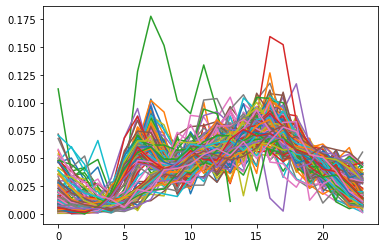

In [30]:
for date in df_by_hour["date"].unique():
    data=df_by_hour_merged[df_by_hour_merged["date"]==date]
    x = data["time"]
    kpi = data["relative_trips"]
    plt.plot(x,kpi)

_______________________________

# Geographic Clustering for availability analysis

In [68]:
import geopandas as gpd

In [69]:
locs = df[["orig_lat","orig_lng"]].rename(columns={"orig_lat": "lat","orig_lng":"lng"})
locs.append(df[["dest_lat","dest_lng"]].rename(columns={"dest_lat": "lat","dest_lng":"lng"}),ignore_index=True)
locs

,lat,lng
0,51.330271,12.341983
1,51.330347,12.342159
2,51.330267,12.342196
3,51.330298,12.341811
4,51.343107,12.376471
...,...,...
185322,51.468822,11.290048
185323,51.468756,11.289723
185324,51.469044,11.289348
185325,51.341165,12.365045


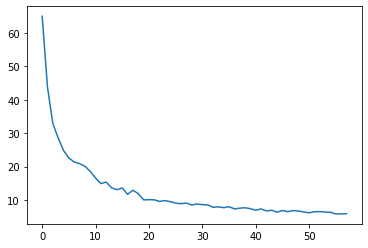

In [70]:
from sklearn.cluster import MiniBatchKMeans, KMeans

ssd = []
for i in range(2, 60):
    km = MiniBatchKMeans(n_clusters=i)
    km.fit_predict(locs)
    ssd.append(km.inertia_)
    
plt.plot(ssd)

In [71]:
n = 40

km = MiniBatchKMeans(n_clusters=n)
km.fit_predict(locs)
clusters = pd.DataFrame(km.cluster_centers_)
clusters.columns = ['lat', 'lng']
clusters_gdf = gpd.GeoDataFrame(
    clusters.drop(["lat","lng"],axis=1), geometry=gpd.points_from_xy(clusters["lng"], clusters["lat"]))
clusters_gdf

,geometry
0,POINT (12.34366 51.32479)
1,POINT (12.38728 51.33594)
2,POINT (12.42615 51.34308)
3,POINT (12.36313 51.34154)
4,POINT (12.37580 51.31982)
5,POINT (12.31927 51.32698)
6,POINT (12.37941 51.33850)
7,POINT (12.36513 51.36331)
8,POINT (12.31881 51.34510)
9,POINT (12.39958 51.34360)


In [72]:
locs_gdf = gpd.GeoDataFrame(
    locs.drop(["lat","lng"],axis=1), geometry=gpd.points_from_xy(locs["lng"], locs["lat"]))
locs_gdf

,geometry
0,POINT (12.34198 51.33027)
1,POINT (12.34216 51.33035)
2,POINT (12.34220 51.33027)
3,POINT (12.34181 51.33030)
4,POINT (12.37647 51.34311)
...,...
185322,POINT (11.29005 51.46882)
185323,POINT (11.28972 51.46876)
185324,POINT (11.28935 51.46904)
185325,POINT (12.36504 51.34117)


(51.2, 51.5)

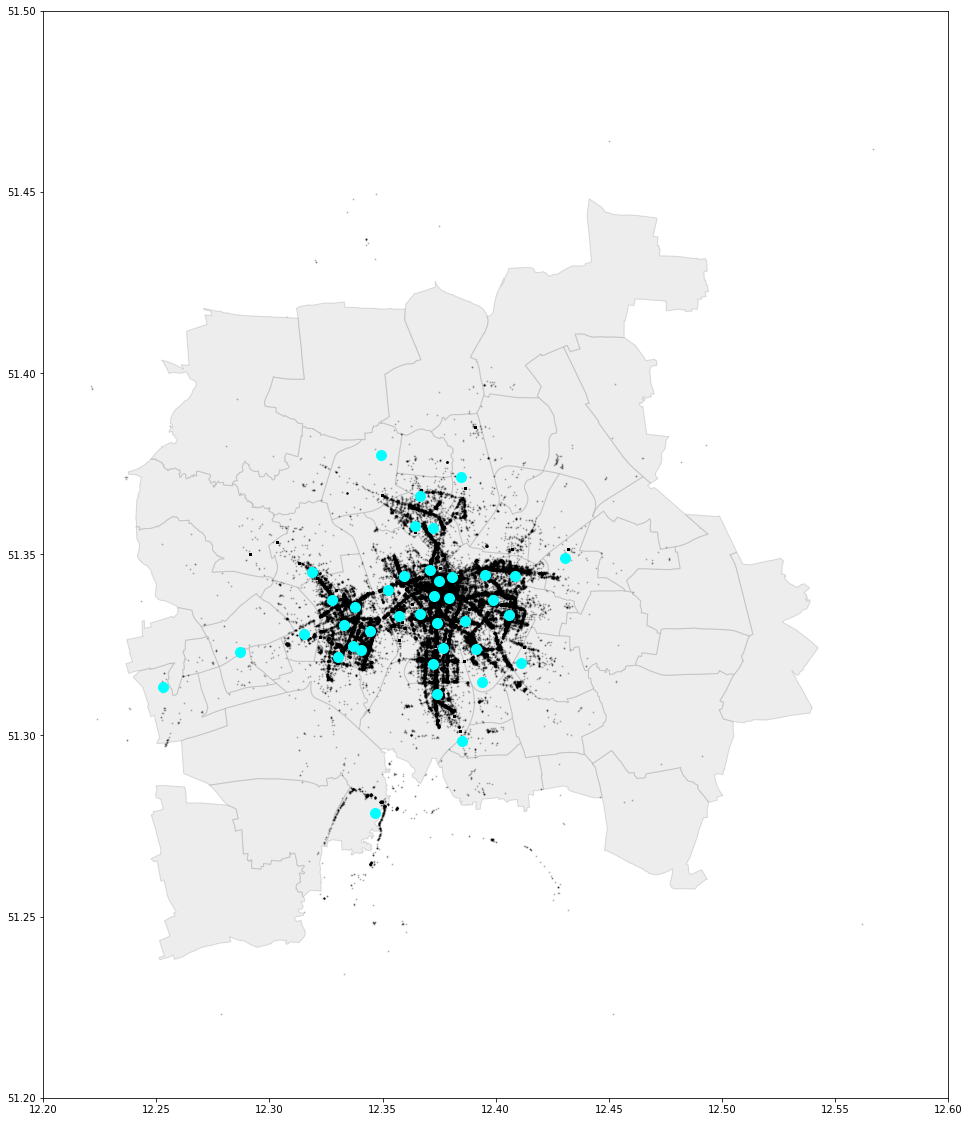

In [49]:
leipzig_map = gpd.read_file("./resources/leipzig/ot.shp").to_crs(epsg=4326) #original file is in a different system

fig, ax = plt.subplots(figsize=(30,20))

locs_gdf.plot(ax=ax, alpha=0.2, color = [0,0,0], markersize=1, zorder=2)
clusters_gdf.plot(ax=ax, alpha=1, color='cyan', markersize=100,  zorder=3)
leipzig_map.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)

#formatting
plt.xlim([12.2, 12.6])
plt.ylim([51.2,51.5])

## Availability Analysis
This function calculates what happened between rental times. It analyzes whether, between rentals, a bike has been available at a certain station or whether it has been moved to a different location. This can then be used for example to calculate the number of available bikes at a certain station at a single time. We use it to calculate our KPI of percentage of stations without available bikes. It can be used for further analysis in this topic as well.

In [64]:
round_factor = 2
df

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Week,Time,date,date_str,revenue,timestamp_end
0,10900,leipzig,0 days 00:12:00,51.330271,12.341983,51.330347,12.342159,2019-04-16 11:17:00,2019-04-16 11:00:00,1,16,11,2019-04-16,2019-04-16,1.0,2019-04-16 11:29:00
1,10900,leipzig,0 days 00:08:00,51.330347,12.342159,51.330271,12.342199,2019-04-16 11:35:00,2019-04-16 11:00:00,1,16,11,2019-04-16,2019-04-16,1.0,2019-04-16 11:43:00
2,10900,leipzig,0 days 00:40:00,51.330267,12.342196,51.330236,12.342012,2019-04-16 11:53:00,2019-04-16 11:00:00,1,16,11,2019-04-16,2019-04-16,2.0,2019-04-16 12:33:00
3,10900,leipzig,0 days 00:03:00,51.330298,12.341811,51.330267,12.341958,2019-04-16 14:35:00,2019-04-16 14:00:00,1,16,14,2019-04-16,2019-04-16,1.0,2019-04-16 14:38:00
4,20000,leipzig,0 days 00:20:00,51.343107,12.376471,51.330422,12.337838,2019-05-21 09:47:00,2019-05-21 09:00:00,1,21,9,2019-05-21,2019-05-21,1.0,2019-05-21 10:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185322,99979,leipzig,0 days 00:07:00,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,2019-05-25 10:00:00,5,21,10,2019-05-25,2019-05-25,1.0,2019-05-25 11:05:00
185323,99979,leipzig,0 days 01:16:00,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,2019-05-27 09:00:00,0,22,9,2019-05-27,2019-05-27,3.0,2019-05-27 10:48:00
185324,99979,leipzig,0 days 00:03:00,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,2019-05-27 11:00:00,0,22,11,2019-05-27,2019-05-27,1.0,2019-05-27 11:05:00
185325,99982,leipzig,0 days 01:44:00,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,2019-02-11 11:00:00,0,7,11,2019-02-11,2019-02-11,4.0,2019-02-11 13:31:00


In [65]:
df2 = df[:]

df2["timestamp_end"] = df2["timestamp"] + df2["trip_duration"]
df2=df2.drop(columns=['date', 'date_str', "revenue", "Weekday", "Time", "timestamp_rounded","trip_duration"])

#df2 = df2.round({"orig_lat":round_factor, 'orig_lng':round_factor, 'dest_lat':round_factor, "dest_lng":round_factor})

#make sure it is sorted by b_number, then timestamp
df2 = df2.sort_values(by=['b_number','timestamp'])
#make sure the index is still +1 every time after sorting
df2.reset_index(inplace=True)
df2 = df2.rename(columns={"index": "original_index"})


df2

,original_index,b_number,city,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,Week,timestamp_end
0,0,10900,leipzig,51.330271,12.341983,51.330347,12.342159,2019-04-16 11:17:00,16,2019-04-16 11:29:00
1,1,10900,leipzig,51.330347,12.342159,51.330271,12.342199,2019-04-16 11:35:00,16,2019-04-16 11:43:00
2,2,10900,leipzig,51.330267,12.342196,51.330236,12.342012,2019-04-16 11:53:00,16,2019-04-16 12:33:00
3,3,10900,leipzig,51.330298,12.341811,51.330267,12.341958,2019-04-16 14:35:00,16,2019-04-16 14:38:00
4,4,20000,leipzig,51.343107,12.376471,51.330422,12.337838,2019-05-21 09:47:00,21,2019-05-21 10:07:00
...,...,...,...,...,...,...,...,...,...,...
185322,185322,99979,leipzig,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,21,2019-05-25 11:05:00
185323,185323,99979,leipzig,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,22,2019-05-27 10:48:00
185324,185324,99979,leipzig,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,22,2019-05-27 11:05:00
185325,185325,99982,leipzig,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,7,2019-02-11 13:31:00


This step will take a while, as it clusters each entry to a specific cluster point, which takes a lot of computing power.

In [81]:
df3 = []

bike_number = 0
bike_city = ""

for index in df2.index:
    if  df2.at[index,"b_number"] != bike_number:
        bike_number = df2.at[index,"b_number"]
        bike_city = df2.at[index,"city"]
    else:
        lat = df2.at[index,"orig_lat"]
        lng = df2.at[index,"orig_lng"]
        cluster_point = next_cluster(lng,lat,clusters)
        time_start = df2.at[index-1,"timestamp_end"]
        time_end = df2.at[index,"timestamp"]
        
        #test if it is working
        if index % 20000 == 0:
            print("reached row", index, "of", df2.index.max())
        
        action_type = "station"
        if lat == df2.at[index-1,"dest_lat"] and lng != df2.at[index-1,"dest_lng"]:
            action_type = "moved"
            
        d = {
            'b_number' : bike_number,
            'b_city' : bike_city,
            'lat' : lat,  # some formula for obtaining values
            'lng' : lng,
            'timestamp' : time_start,
            'action_type' : action_type+"_in",
            'cluster_point': cluster_point
            }
        df3.append(d)
        d = {
            'b_number' : bike_number,
            'b_city' : bike_city,
            'lat' : lat,  # some formula for obtaining values
            'lng' : lng,
            'timestamp' : time_end,
            'action_type' : action_type+"_out",
            'cluster_point': cluster_point
            }
        df3.append(d)

df3 = pd.DataFrame(df3)

reached row 2000 of 185326
reached row 3000 of 185326
reached row 4000 of 185326
reached row 5000 of 185326
reached row 6000 of 185326
reached row 7000 of 185326
reached row 8000 of 185326
reached row 9000 of 185326
reached row 10000 of 185326
reached row 11000 of 185326
reached row 12000 of 185326
reached row 13000 of 185326
reached row 14000 of 185326
reached row 15000 of 185326
reached row 16000 of 185326
reached row 17000 of 185326
reached row 18000 of 185326
reached row 19000 of 185326
reached row 20000 of 185326
reached row 21000 of 185326
reached row 22000 of 185326
reached row 23000 of 185326
reached row 24000 of 185326
reached row 25000 of 185326
reached row 26000 of 185326
reached row 27000 of 185326
reached row 28000 of 185326
reached row 29000 of 185326
reached row 30000 of 185326
reached row 31000 of 185326
reached row 32000 of 185326
reached row 33000 of 185326
reached row 34000 of 185326
reached row 35000 of 185326
reached row 36000 of 185326
reached row 37000 of 185326


In [84]:
df3["cluster_point"] = df3["cluster_point"].astype(str)
df3

,b_number,b_city,lat,lng,timestamp,action_type,cluster_point
0,10900,leipzig,51.330347,12.342159,2019-04-16 11:29:00,station_in,"[12.33538693161768, 51.330602812171264]"
1,10900,leipzig,51.330347,12.342159,2019-04-16 11:35:00,station_out,"[12.33538693161768, 51.330602812171264]"
2,10900,leipzig,51.330267,12.342196,2019-04-16 11:43:00,station_in,"[12.33538693161768, 51.330602812171264]"
3,10900,leipzig,51.330267,12.342196,2019-04-16 11:53:00,station_out,"[12.33538693161768, 51.330602812171264]"
4,10900,leipzig,51.330298,12.341811,2019-04-16 12:33:00,station_in,"[12.33538693161768, 51.330602812171264]"
...,...,...,...,...,...,...,...
368633,99979,leipzig,51.468822,11.290048,2019-05-25 10:58:00,station_out,"[12.210240185185333, 51.360441]"
368634,99979,leipzig,51.468756,11.289723,2019-05-25 11:05:00,station_in,"[12.210240185185333, 51.360441]"
368635,99979,leipzig,51.468756,11.289723,2019-05-27 09:32:00,station_out,"[12.210240185185333, 51.360441]"
368636,99979,leipzig,51.469044,11.289348,2019-05-27 10:48:00,station_in,"[12.210240185185333, 51.360441]"


This algorithm takes goes over all records that relate to bikes standing at a certain station. For each change event, it calculates the effect on the capacity of a certain station.

In [86]:
#filter df3 for all events related to bikes standing at a station (not being moved between rides)
df3 = df3[df3["action_type"].isin(["station_in","station_out"])]

#filter correctly for the algorithm to work properly
df3=df3.sort_values(by=['cluster_point','timestamp','action_type'])
df3.reset_index(inplace=True)
df3 = df3.rename(columns={"index": "original_index"})

df3["count"] = 0

station = ""
count = 0

for index in df3.index:
    action_type = df3.at[index,"action_type"]
    #if this is a different station, restart the calculation
    if  df3.at[index,"cluster_point"] != station:
        station = df3.at[index,"cluster_point"]
        count = 0
    if action_type == "station_in":
         count = count + 1
    elif action_type == "station_out":
        count = count - 1
    else:
        print("there was an error")
    
    df3.at[index,"count"] = count

In [87]:
df3

,original_index,b_number,b_city,lat,lng,timestamp,action_type,cluster_point,count
0,296418,23550,leipzig,51.355671,12.265382,2019-03-23 01:44:00,station_in,"[12.210240185185333, 51.360441]",1
1,296419,23550,leipzig,51.355671,12.265382,2019-03-24 21:39:00,station_out,"[12.210240185185333, 51.360441]",0
2,149922,23170,leipzig,51.385511,12.255940,2019-04-21 13:56:00,station_in,"[12.210240185185333, 51.360441]",1
3,31432,20284,leipzig,51.395769,12.221474,2019-04-21 15:31:00,station_in,"[12.210240185185333, 51.360441]",2
4,31433,20284,leipzig,51.395769,12.221474,2019-04-21 15:33:00,station_out,"[12.210240185185333, 51.360441]",1
...,...,...,...,...,...,...,...,...,...
355537,66037,20370,leipzig,51.344938,12.422246,2019-06-30 16:16:00,station_out,"[12.426151527896526, 51.34308335359864]",4
355538,19375,20247,leipzig,51.342796,12.427372,2019-06-30 17:25:00,station_out,"[12.426151527896526, 51.34308335359864]",3
355539,208723,23314,leipzig,51.342911,12.427218,2019-06-30 17:25:00,station_out,"[12.426151527896526, 51.34308335359864]",2
355540,291793,23539,leipzig,51.343262,12.427448,2019-06-30 17:25:00,station_out,"[12.426151527896526, 51.34308335359864]",1


This part produces a list of the minimum available bikes at a certain station. For example, if a station has had 2 bikes for the first ten minutes, then had 3 and in the end had only 1 bike left, this would count as 1 bike for the respective hour period. 
* If there was no change in available bikes, it takes the value for the most recent change event.
* If the number of available bikes changes to zero and no bikes ever get to the station again until the end of the data timeframe, it will not count as 0 bikes as the station might have been closed in the meantime (this should not count as "no bikes available)

In [88]:
df3["timestamp_rounded"] = df3["timestamp"].dt.floor("H")
df3 = df3.sort_values(by=['cluster_point','timestamp'])

start_date = df3.timestamp_rounded.min()
end_date = df3.timestamp_rounded.max()
daterange = pd.date_range(start_date, end_date,freq='1H')

df4 = pd.DataFrame(index=daterange)

for cluster_point in df3.cluster_point.unique():
    dfl = df3[df3.cluster_point == cluster_point]
    dfl = dfl.groupby("timestamp_rounded").agg(
    min_count =("count","min"),
    last_value = ("count", lambda x: x.iloc[-1]))
    dfl = dfl.reindex(daterange, fill_value=None)
    dfl["last_value"] = dfl["last_value"].fillna(method='ffill')
    dfl["min_count"] = dfl.apply(
        lambda row: row['last_value']if np.isnan(row['min_count']) else row['min_count'],axis=1
    )
    for index, row in dfl[::-1].iterrows():
        if row["min_count"] == 0:
            row["min_count"] = None
        else:
            break
    df4[cluster_point] = dfl["min_count"]
    
df4 = df4.T

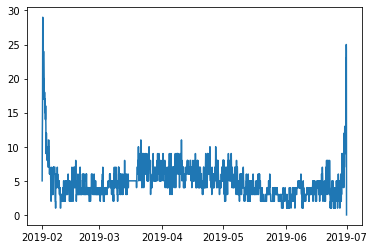

In [96]:
#df4.to_excel("transposed.xlsx")
df5 = df4[df4 < 5].count()
df5
plt.plot(df5)

_______________________________

## Visualisation

In [ ]:
dates = df_by_date_merged.index
fleetsize = df_by_date_merged["fleet_size"]
usage = df_by_date_merged["usage"]
usedbikes = df_by_date_merged["used_bikes"]

Fig_1, ax_1 = plt.subplots()


color = 'tab:red'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Fleet Size', color=color)
ax_1.plot(dates, fleetsize, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:blue'

ax_2.set_ylabel("Used Bikes", color=color)
ax_2.plot(dates, usedbikes, color=color)
ax_2.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Group by rounded start time

In [ ]:
df_by_time = df.groupby("Time").agg(
    mean_length=('trip_duration', lambda x: np.mean(x)),
    trip_count=('b_number', 'count'))

In [ ]:
fig, (ax1, ax1_b) = plt.subplots(nrows = 1, ncols = 2, figsize= (12,4))

x = df_by_time.index
seconds = df_by_time["mean_length"].dt.total_seconds()/60
amount = df_by_time["trip_count"]

color = 'tab:red'
ax1.set_xlabel('Time of the day')
ax1.set_ylabel('Average trip length', color=color)
ax1.plot(x, seconds, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total amount of trips', color=color)  # we already handled the x-label with ax1
ax2.plot(x, amount, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()